In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')
sns.set_style('white')

In [4]:

ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

mpalette = sns.color_palette('Accent', n_colors=5).as_hex()
mpalette = mpalette[0:3] + mpalette[4:5]


In [5]:
mpalette

['#7fc97f', '#beaed4', '#fdc086', '#386cb0']

In [6]:
plt.rcParams['figure.dpi'] = 300

In [7]:
models = [
    'exponential', 
    'biexponential' , 
    'harmonic', 
#    'linear' , 
#    'logistic', 
    'weibull', 
#    'hyperbolic'
]

num_params_lst = [
    1,
    3,
    1,
#    2,
#    2,
    2,
#    2,
]

In [38]:
biexponential_params = [0.645619,0.048457, 0.477545]
exponential_a = 0.084571
weibull_params =  [0.615633,0.230076]
weibull_params2 =  [0.135190,1.311162]
harmonic_a = 0.24701

In [57]:
x = list(range(145))

In [58]:
df = pd.DataFrame({'day': x})

In [59]:
df['biexponential'] = cp.model_biexponential1(df['day'], biexponential_params[0], 100,  
                                              biexponential_params[1], biexponential_params[2],)

In [60]:
df['exponential'] = cp.model_exponential1(df['day'], exponential_a, 100,  1,1,)

df['exponential_death'] = (df['exponential'] - df['exponential'].shift(-1))
df['exponential_survival'] = df['exponential'] - df['exponential_death'] 

In [61]:
df['harmonic'] = cp.model_harmonic(df['day'], harmonic_a, 100,  1,1,)

df['harmonic_death'] = (df['harmonic'] - df['harmonic'].shift(-1))
df['harmonic_survival'] = df['harmonic'] - df['harmonic_death'] 

In [62]:
df['weibull'] = cp.model_weibull(df['day'], weibull_params[0], 6,  
                                              weibull_params[1], 1,)
df['weibull_death'] = (df['weibull'] - df['weibull'].shift(-1))
df['weibull_survival'] = df['weibull'] - df['weibull_death'] 

In [63]:
df['weibull2'] = cp.model_weibull(df['day'], weibull_params2[0], 6,  
                                              weibull_params2[1], 1,)
df['weibull_death2'] = (df['weibull2'] - df['weibull2'].shift(-1))
df['weibull_survival2'] = df['weibull2'] - df['weibull_death2'] 

In [64]:
df['biexponential sub1'] = 100*( biexponential_params[2]*np.exp(- biexponential_params[0] * df['day']))
df['biexponential sub2'] = df['biexponential'] - df['biexponential sub1']
df['biexponential sub1 death'] = (df['biexponential sub1'] - df['biexponential sub1'].shift(-1))
df['biexponential sub1 survival'] = df['biexponential sub1'] - df['biexponential sub1 death'] 
df['biexponential sub2 death'] = (df['biexponential sub2'] - df['biexponential sub2'].shift(-1))
df['biexponential sub2 survival'] = df['biexponential sub2'] - df['biexponential sub2 death'] 

In [65]:
1/weibull_params2[0] , 1/weibull_params[0]

(7.396996819291368, 1.6243443740020436)

(0.0, 20.0)

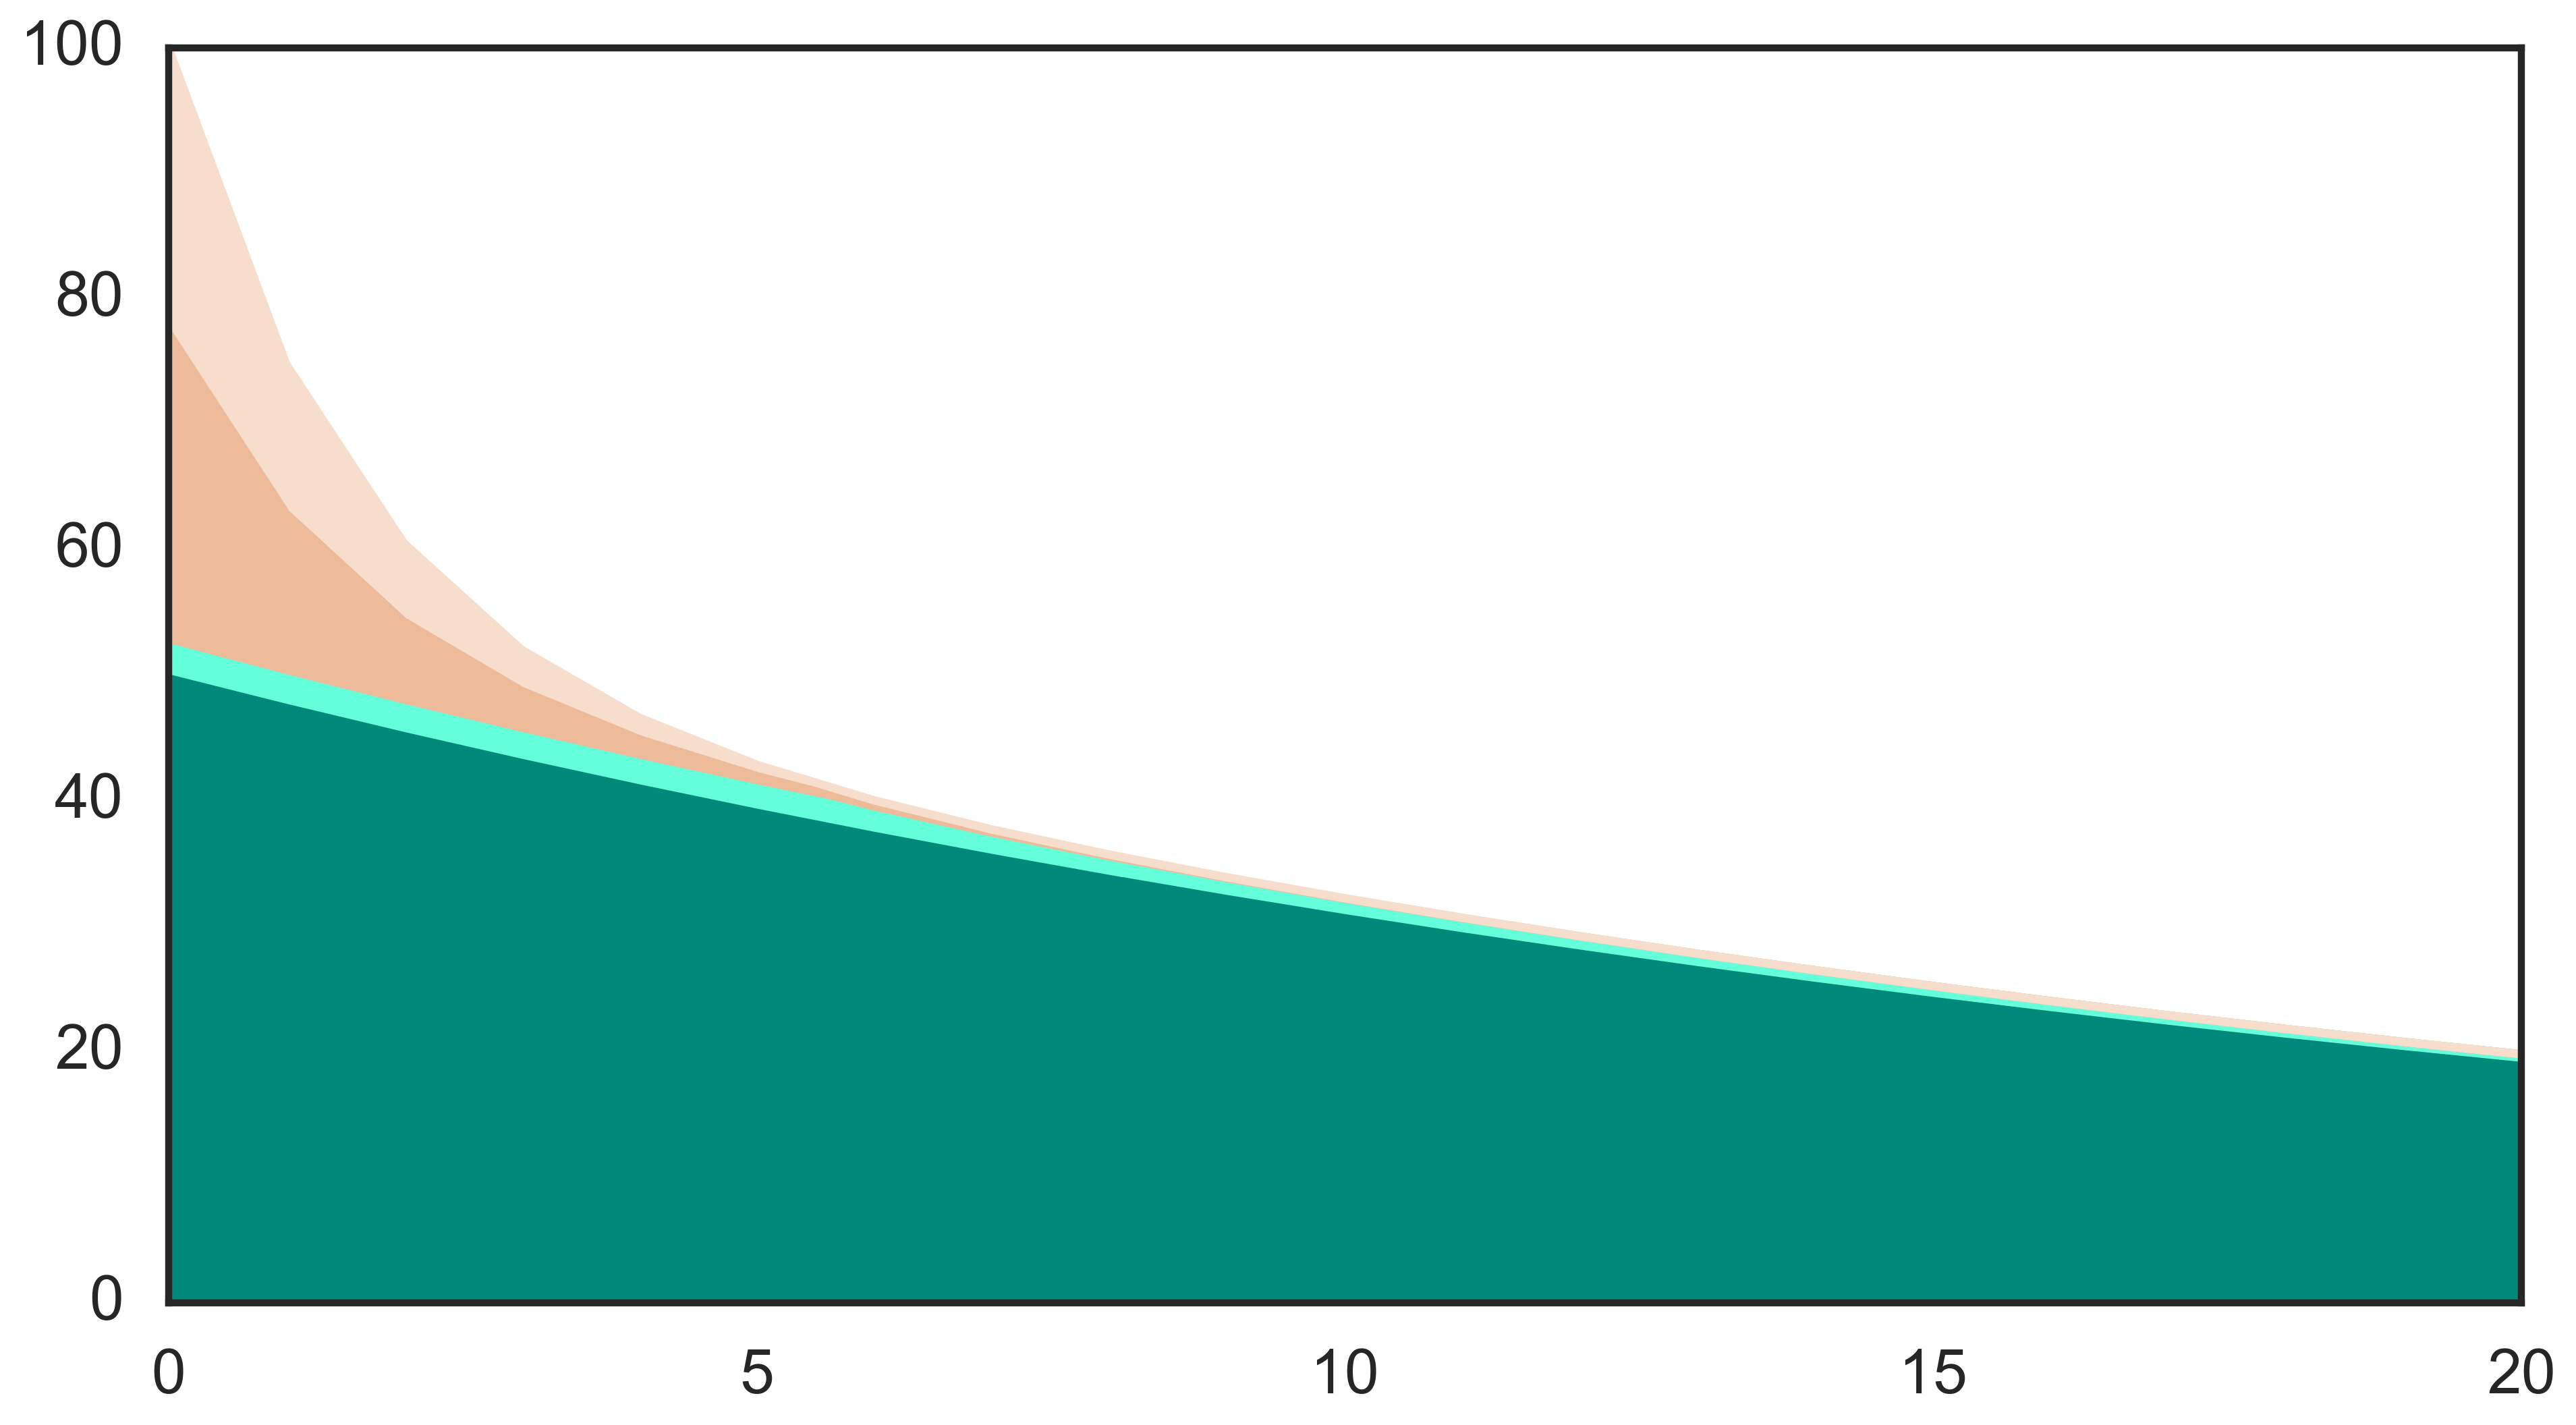

In [66]:
#sns.lineplot(data=df, x='day', y='biexponential')
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#sns.lineplot(data=df, x='day', y='biexponential sub2')
#plt.yscale('log')
#plt.ylim((1e-2, 100))
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']
df[

[
'biexponential sub2 survival',
'biexponential sub2 death',
'biexponential sub1 survival',
    'biexponential sub1 death',

]
    ].plot.area(#legend=False
legend=False, color= colors_lst)
#stacked=False
plt.xlim((0,20))
#plt.ylim((1, 1e2))
#plt.yscale('log')

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.0, 20.0)

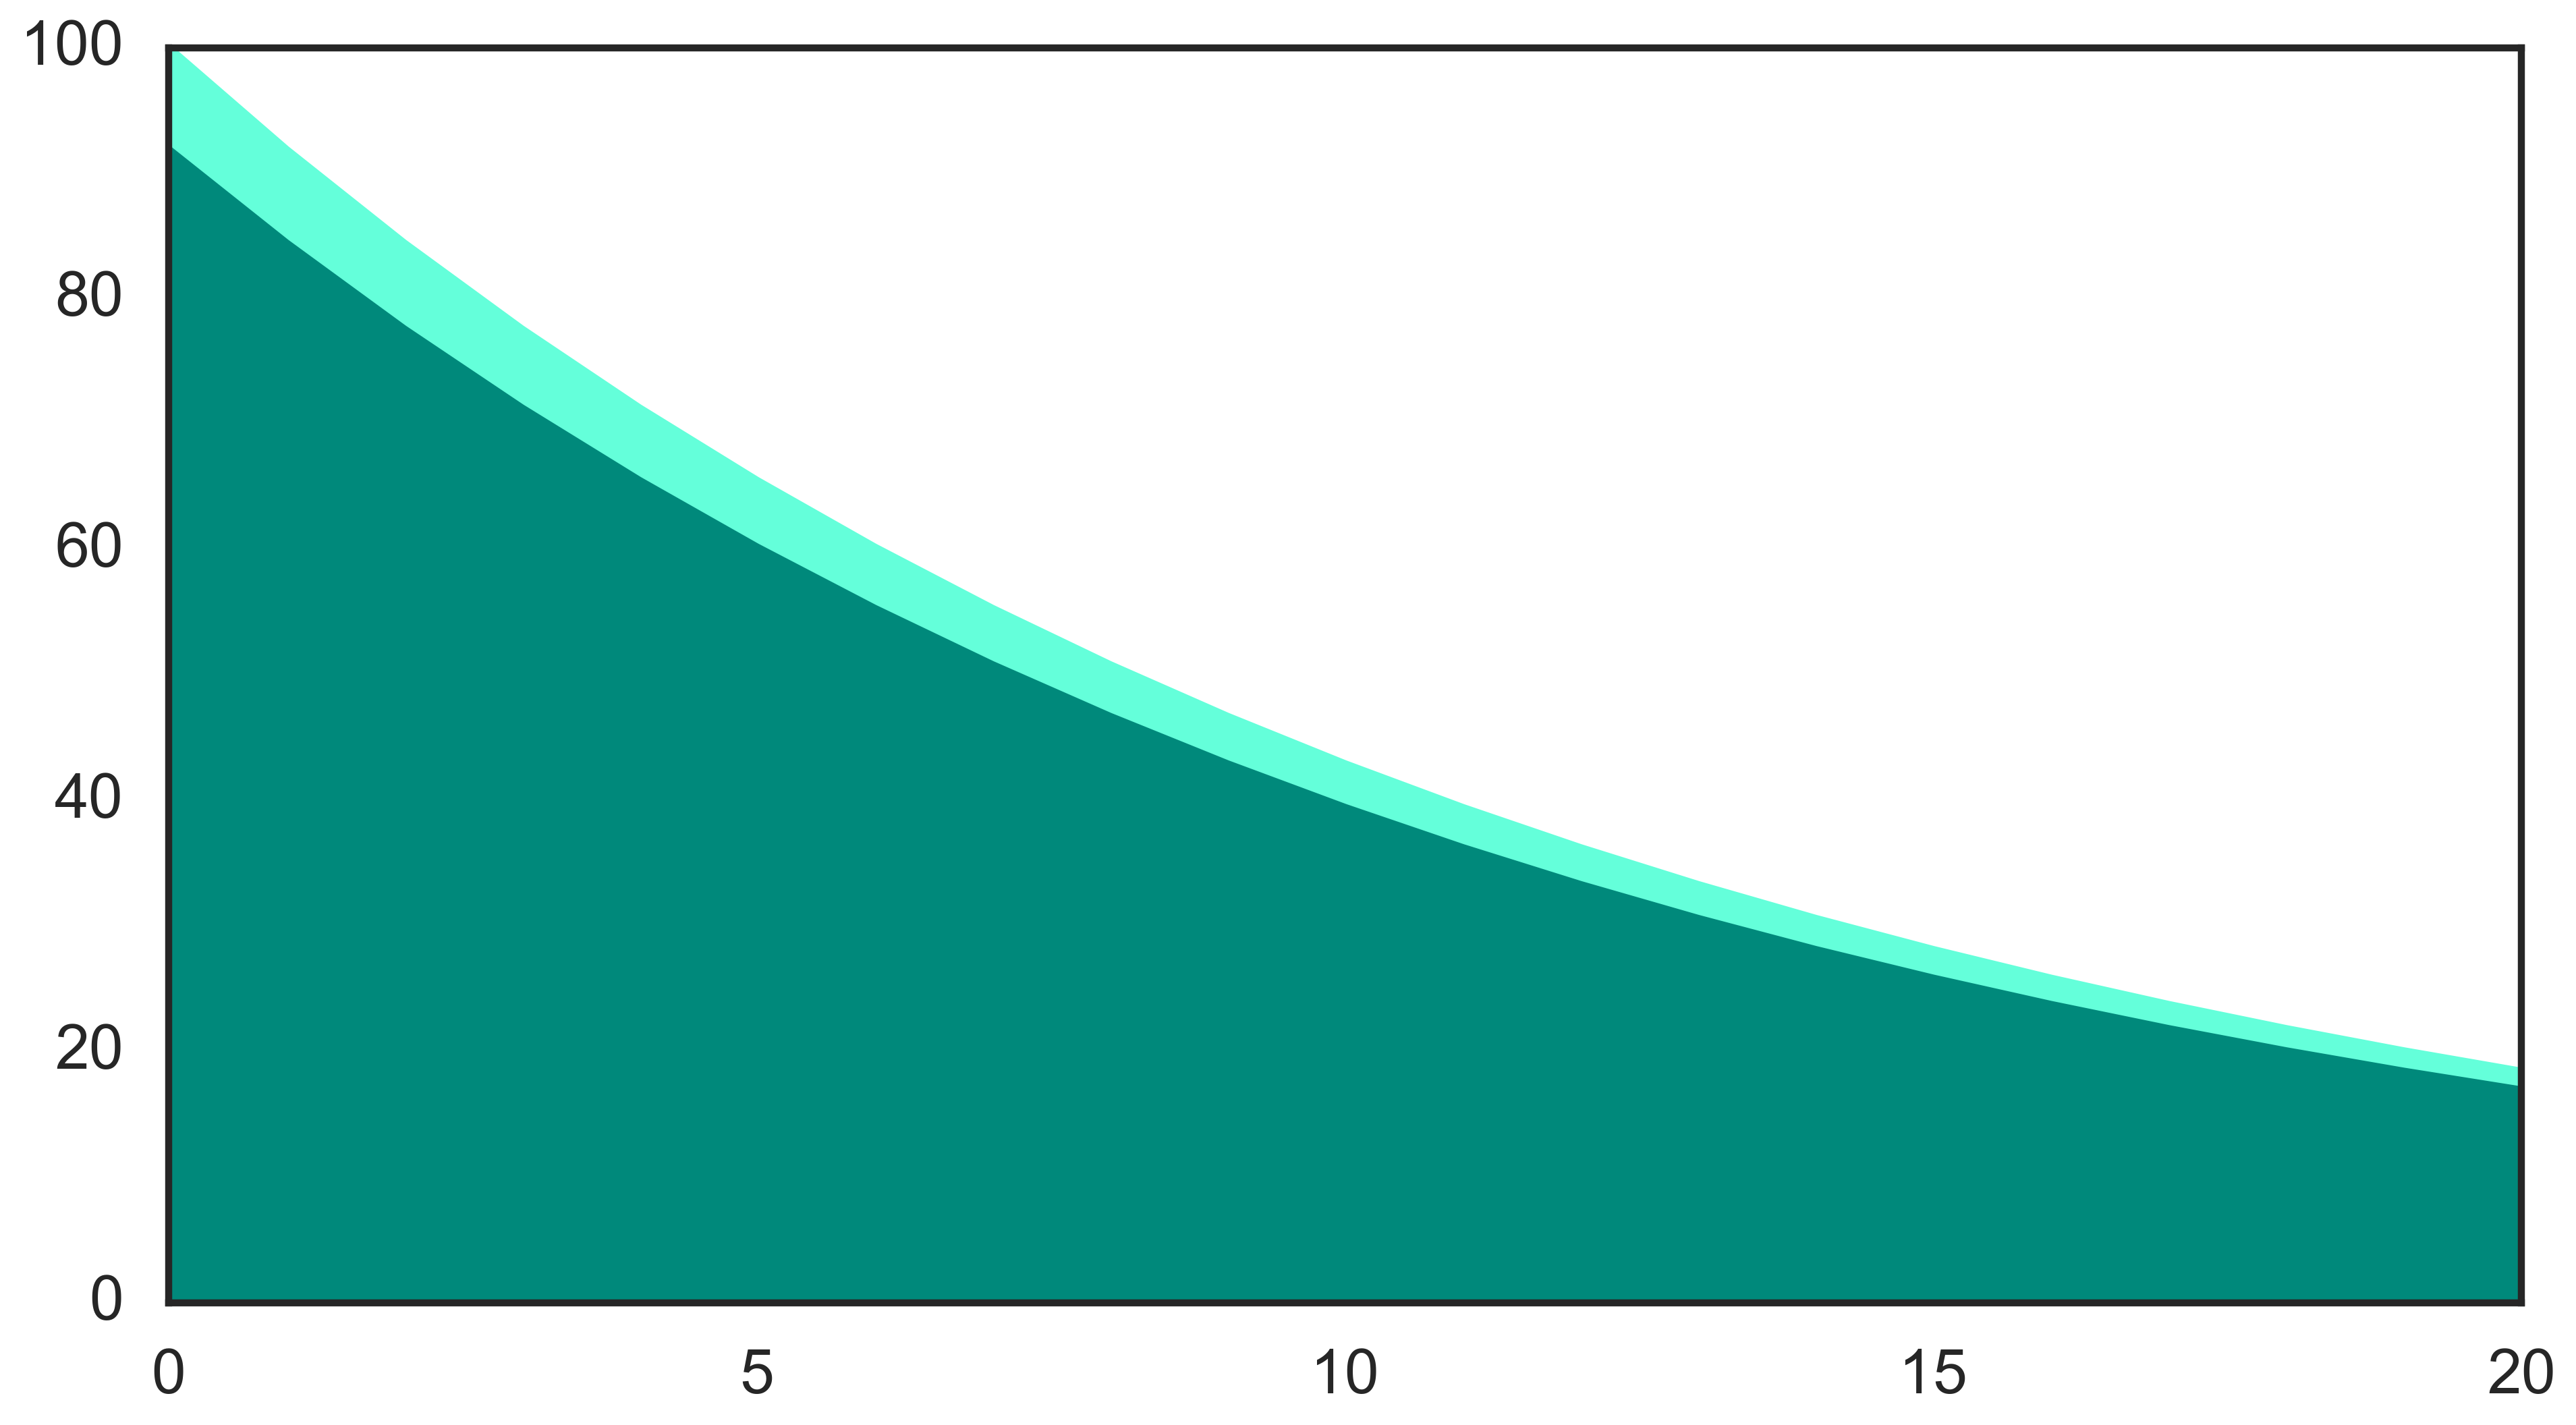

In [67]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['exponential_survival','exponential_death',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst)
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
#plt.yscale('log')
#plt.ylim((1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.0, 40.0)

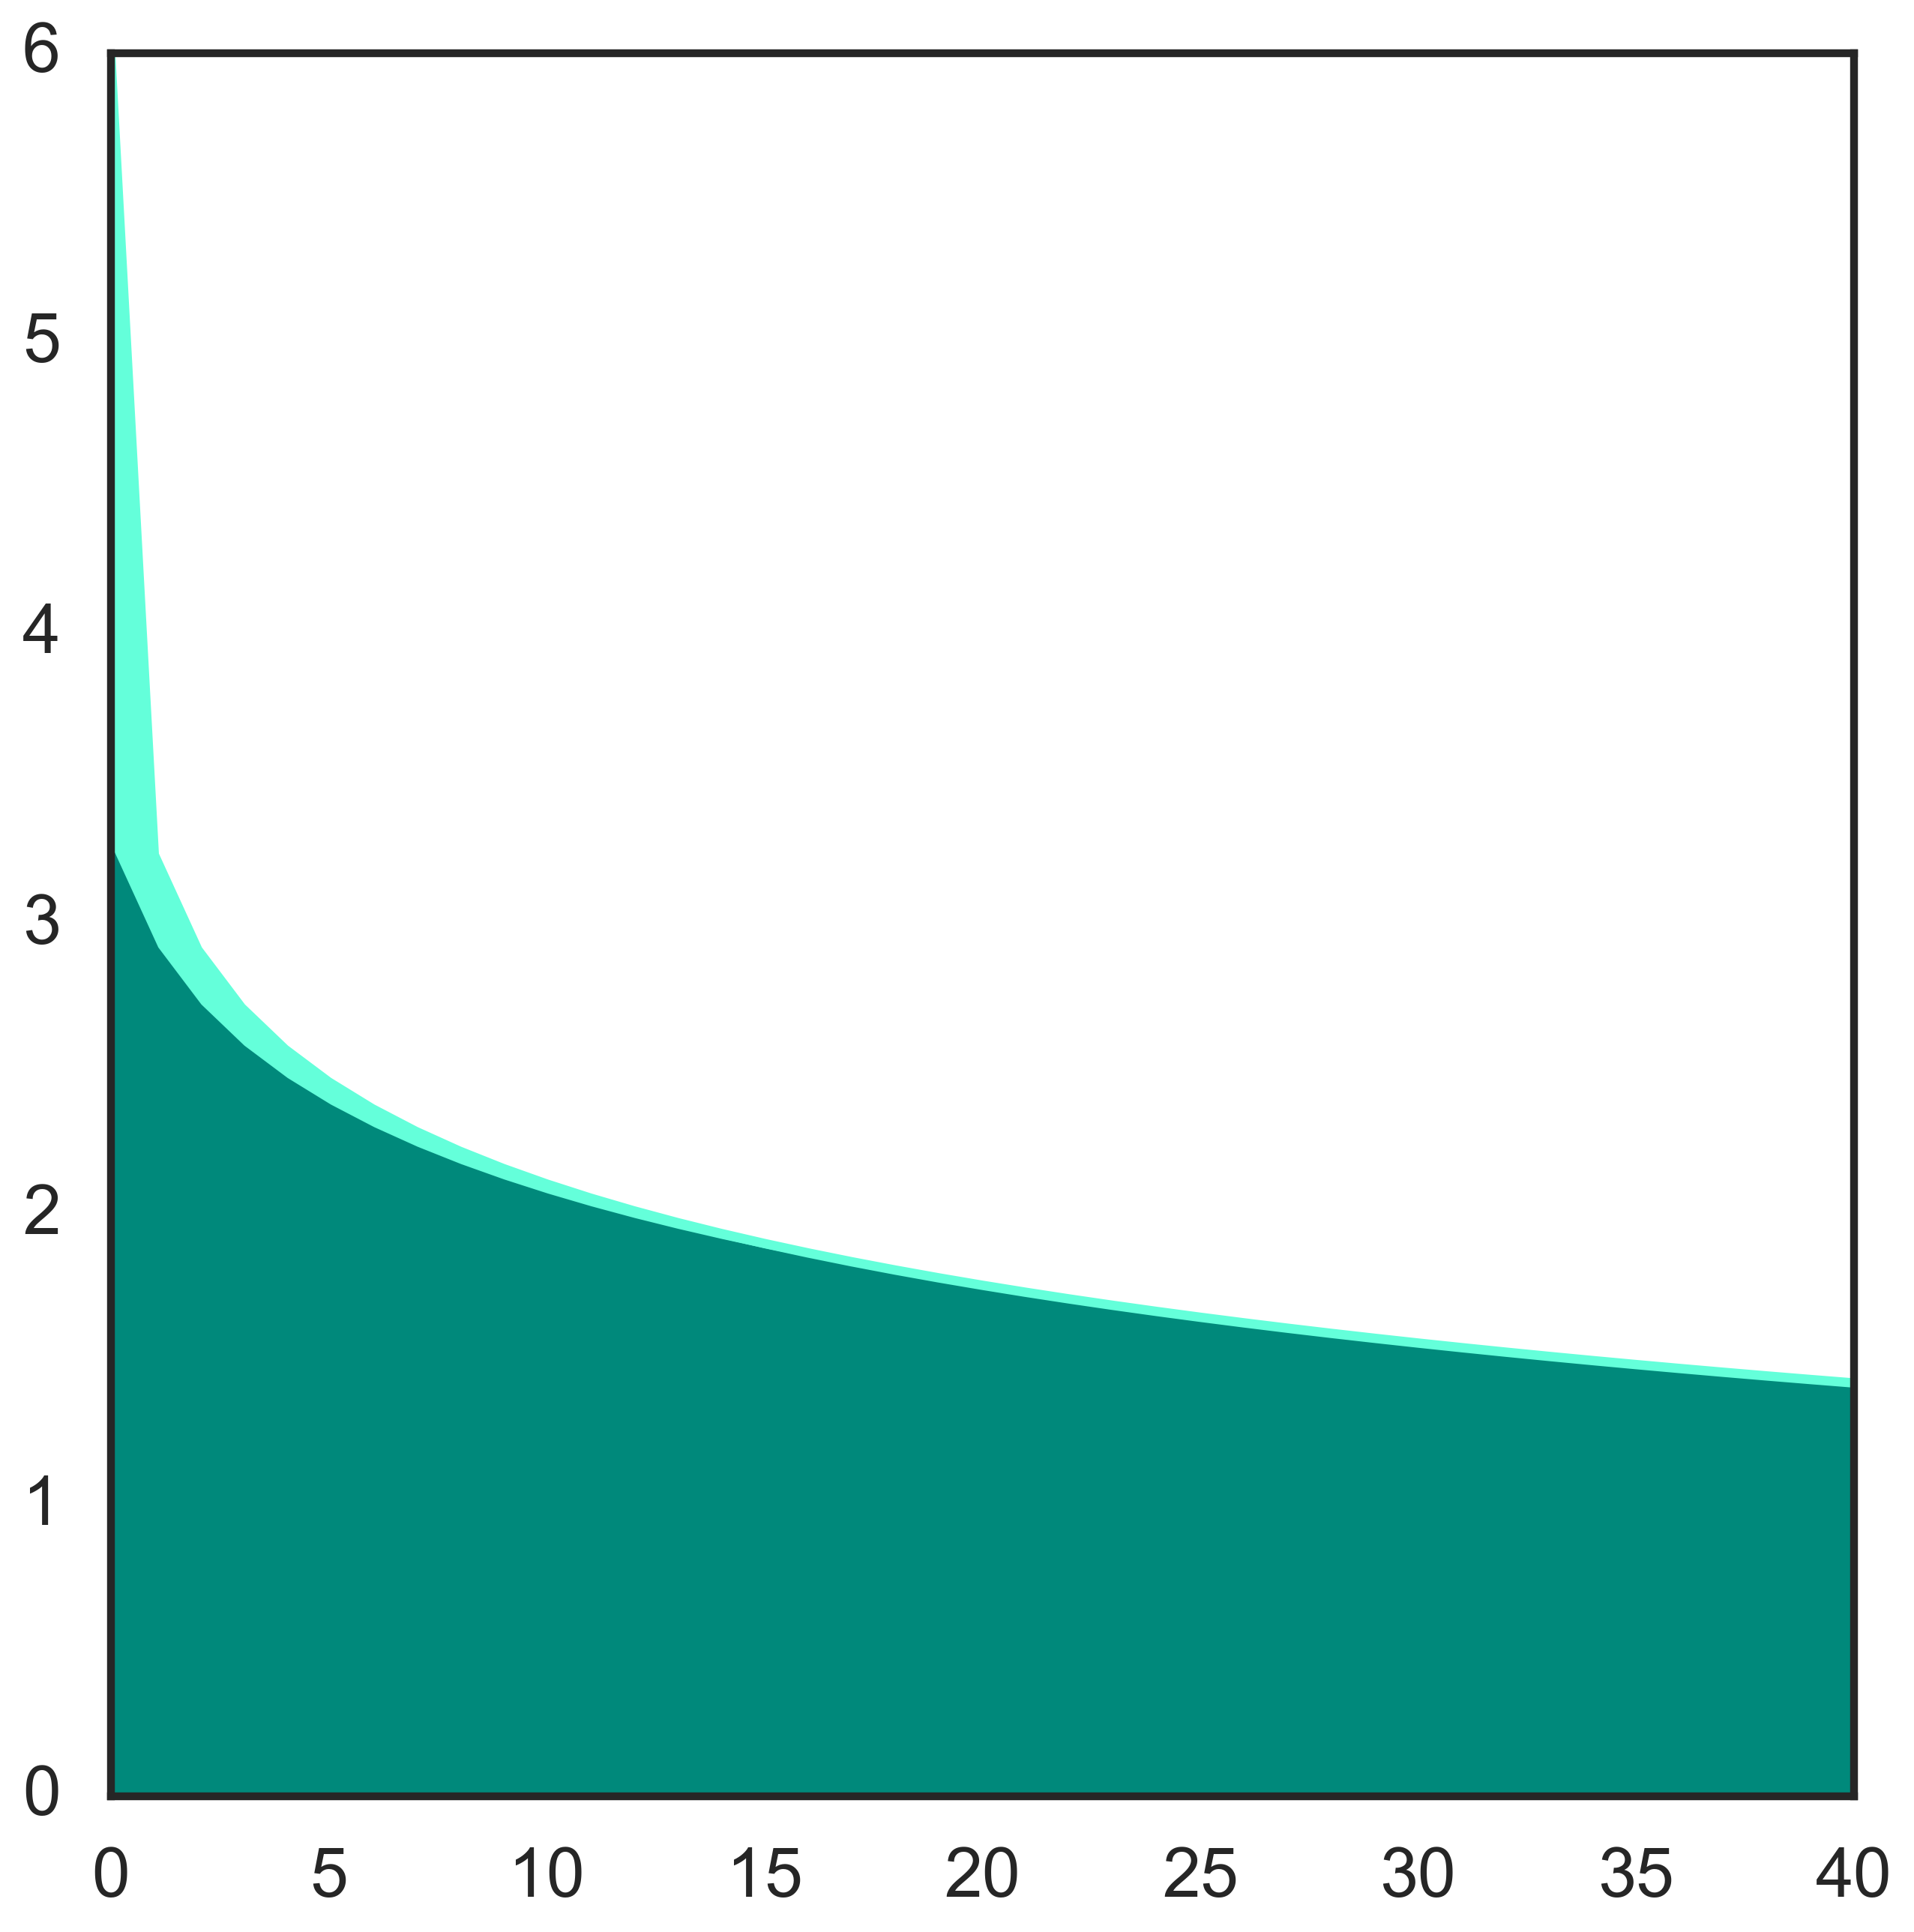

In [68]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['weibull_survival','weibull_death',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst, figsize=(10,10))
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,40))
#plt.yscale('log')
#plt.ylim((1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.0, 20.0)

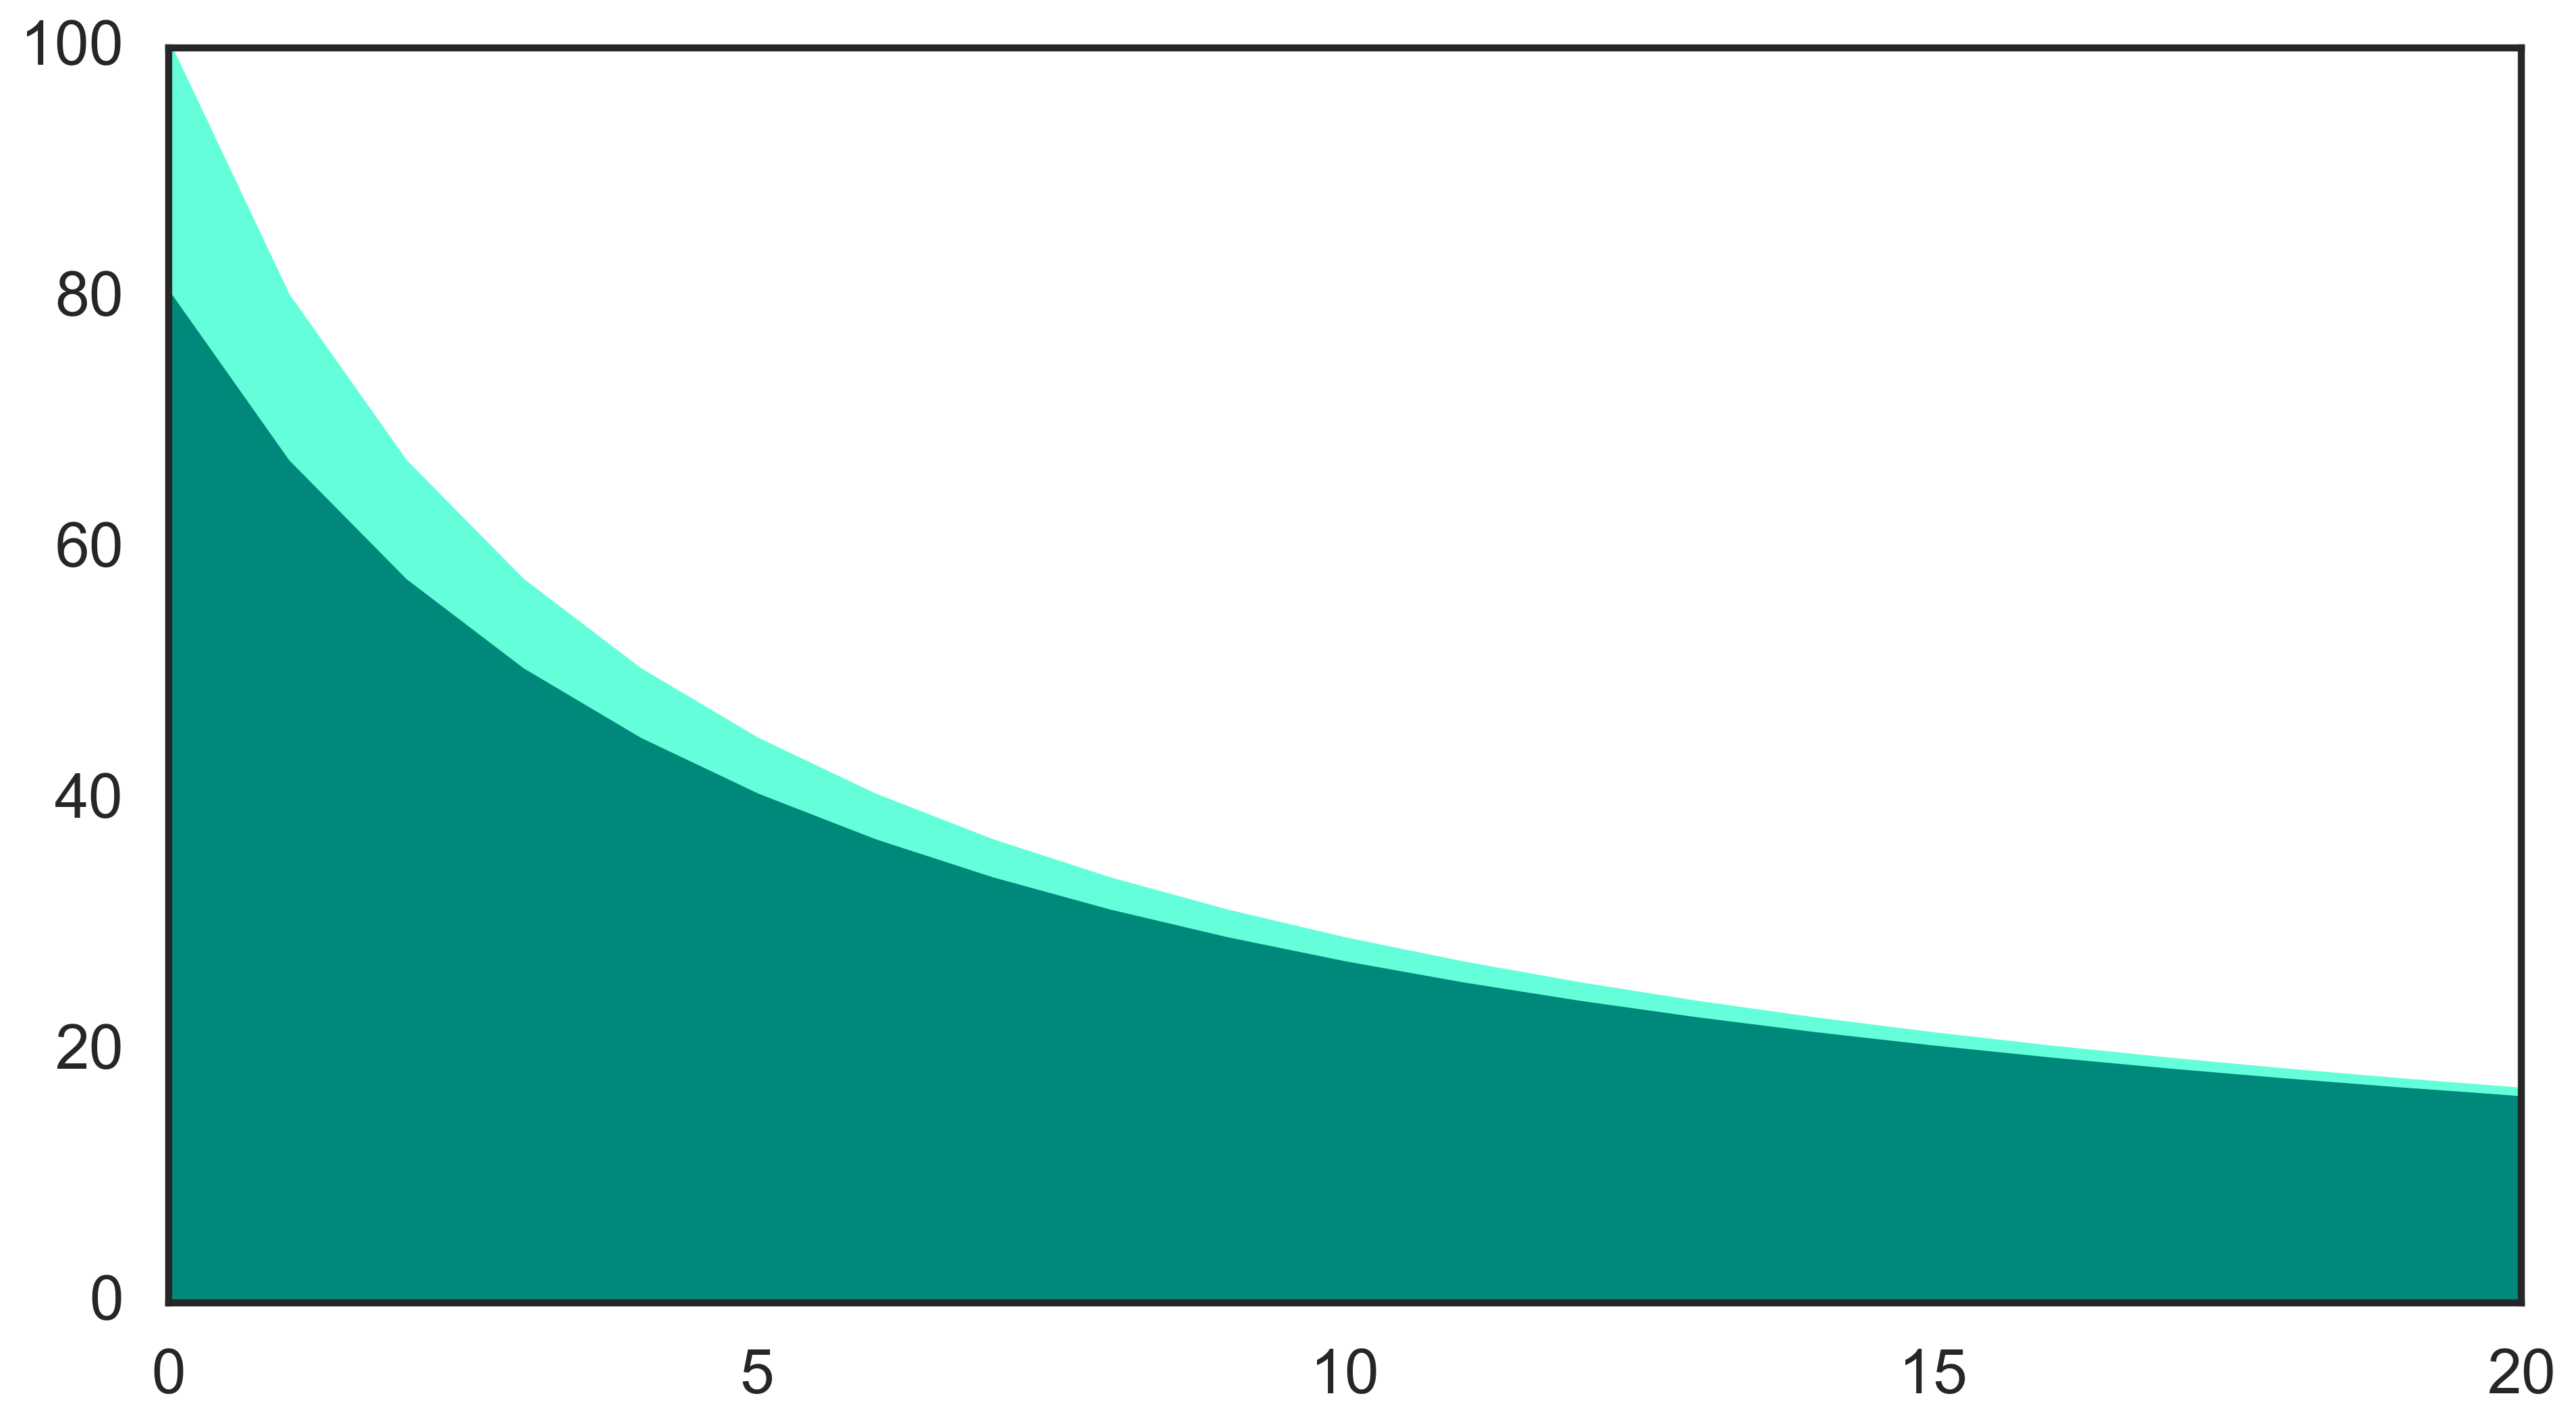

In [69]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['harmonic_survival','harmonic_death',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst)
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
#plt.yscale('log')
#plt.ylim((1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.0, 20.0)

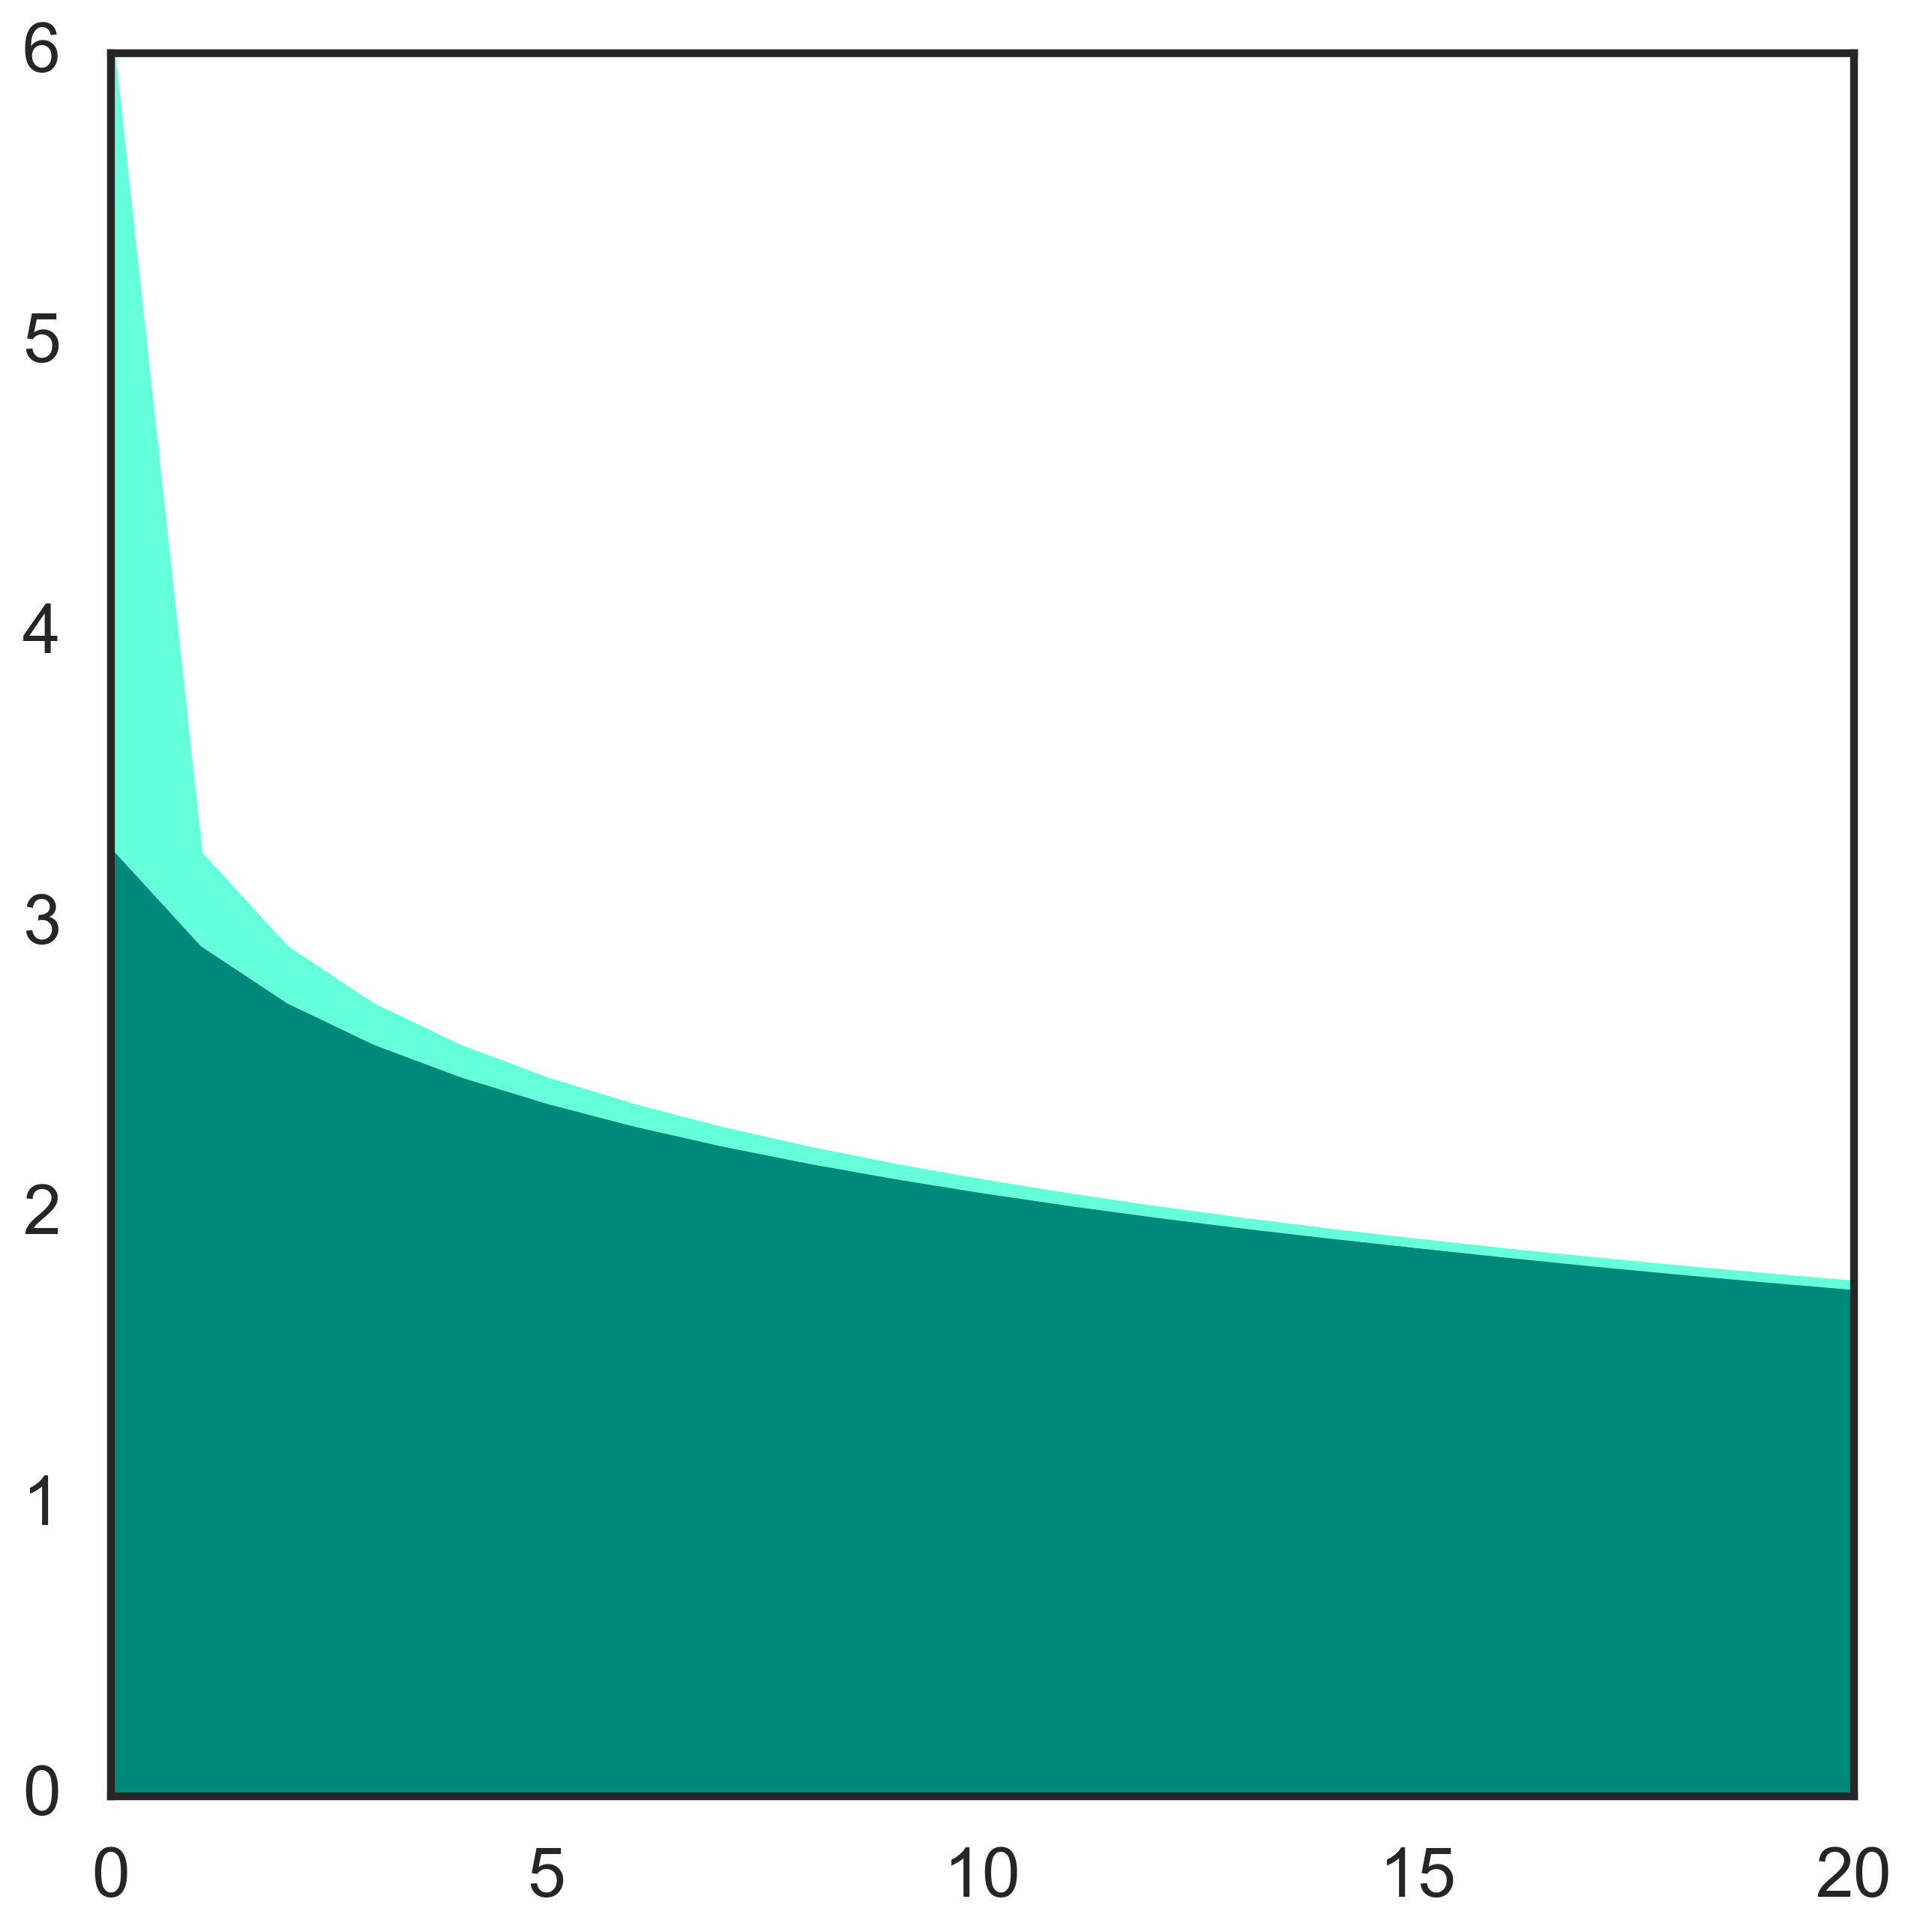

In [75]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['weibull_survival','weibull_death',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst, figsize=(10,10))
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
#plt.yscale('log')
#plt.ylim((1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.0, 20.0)

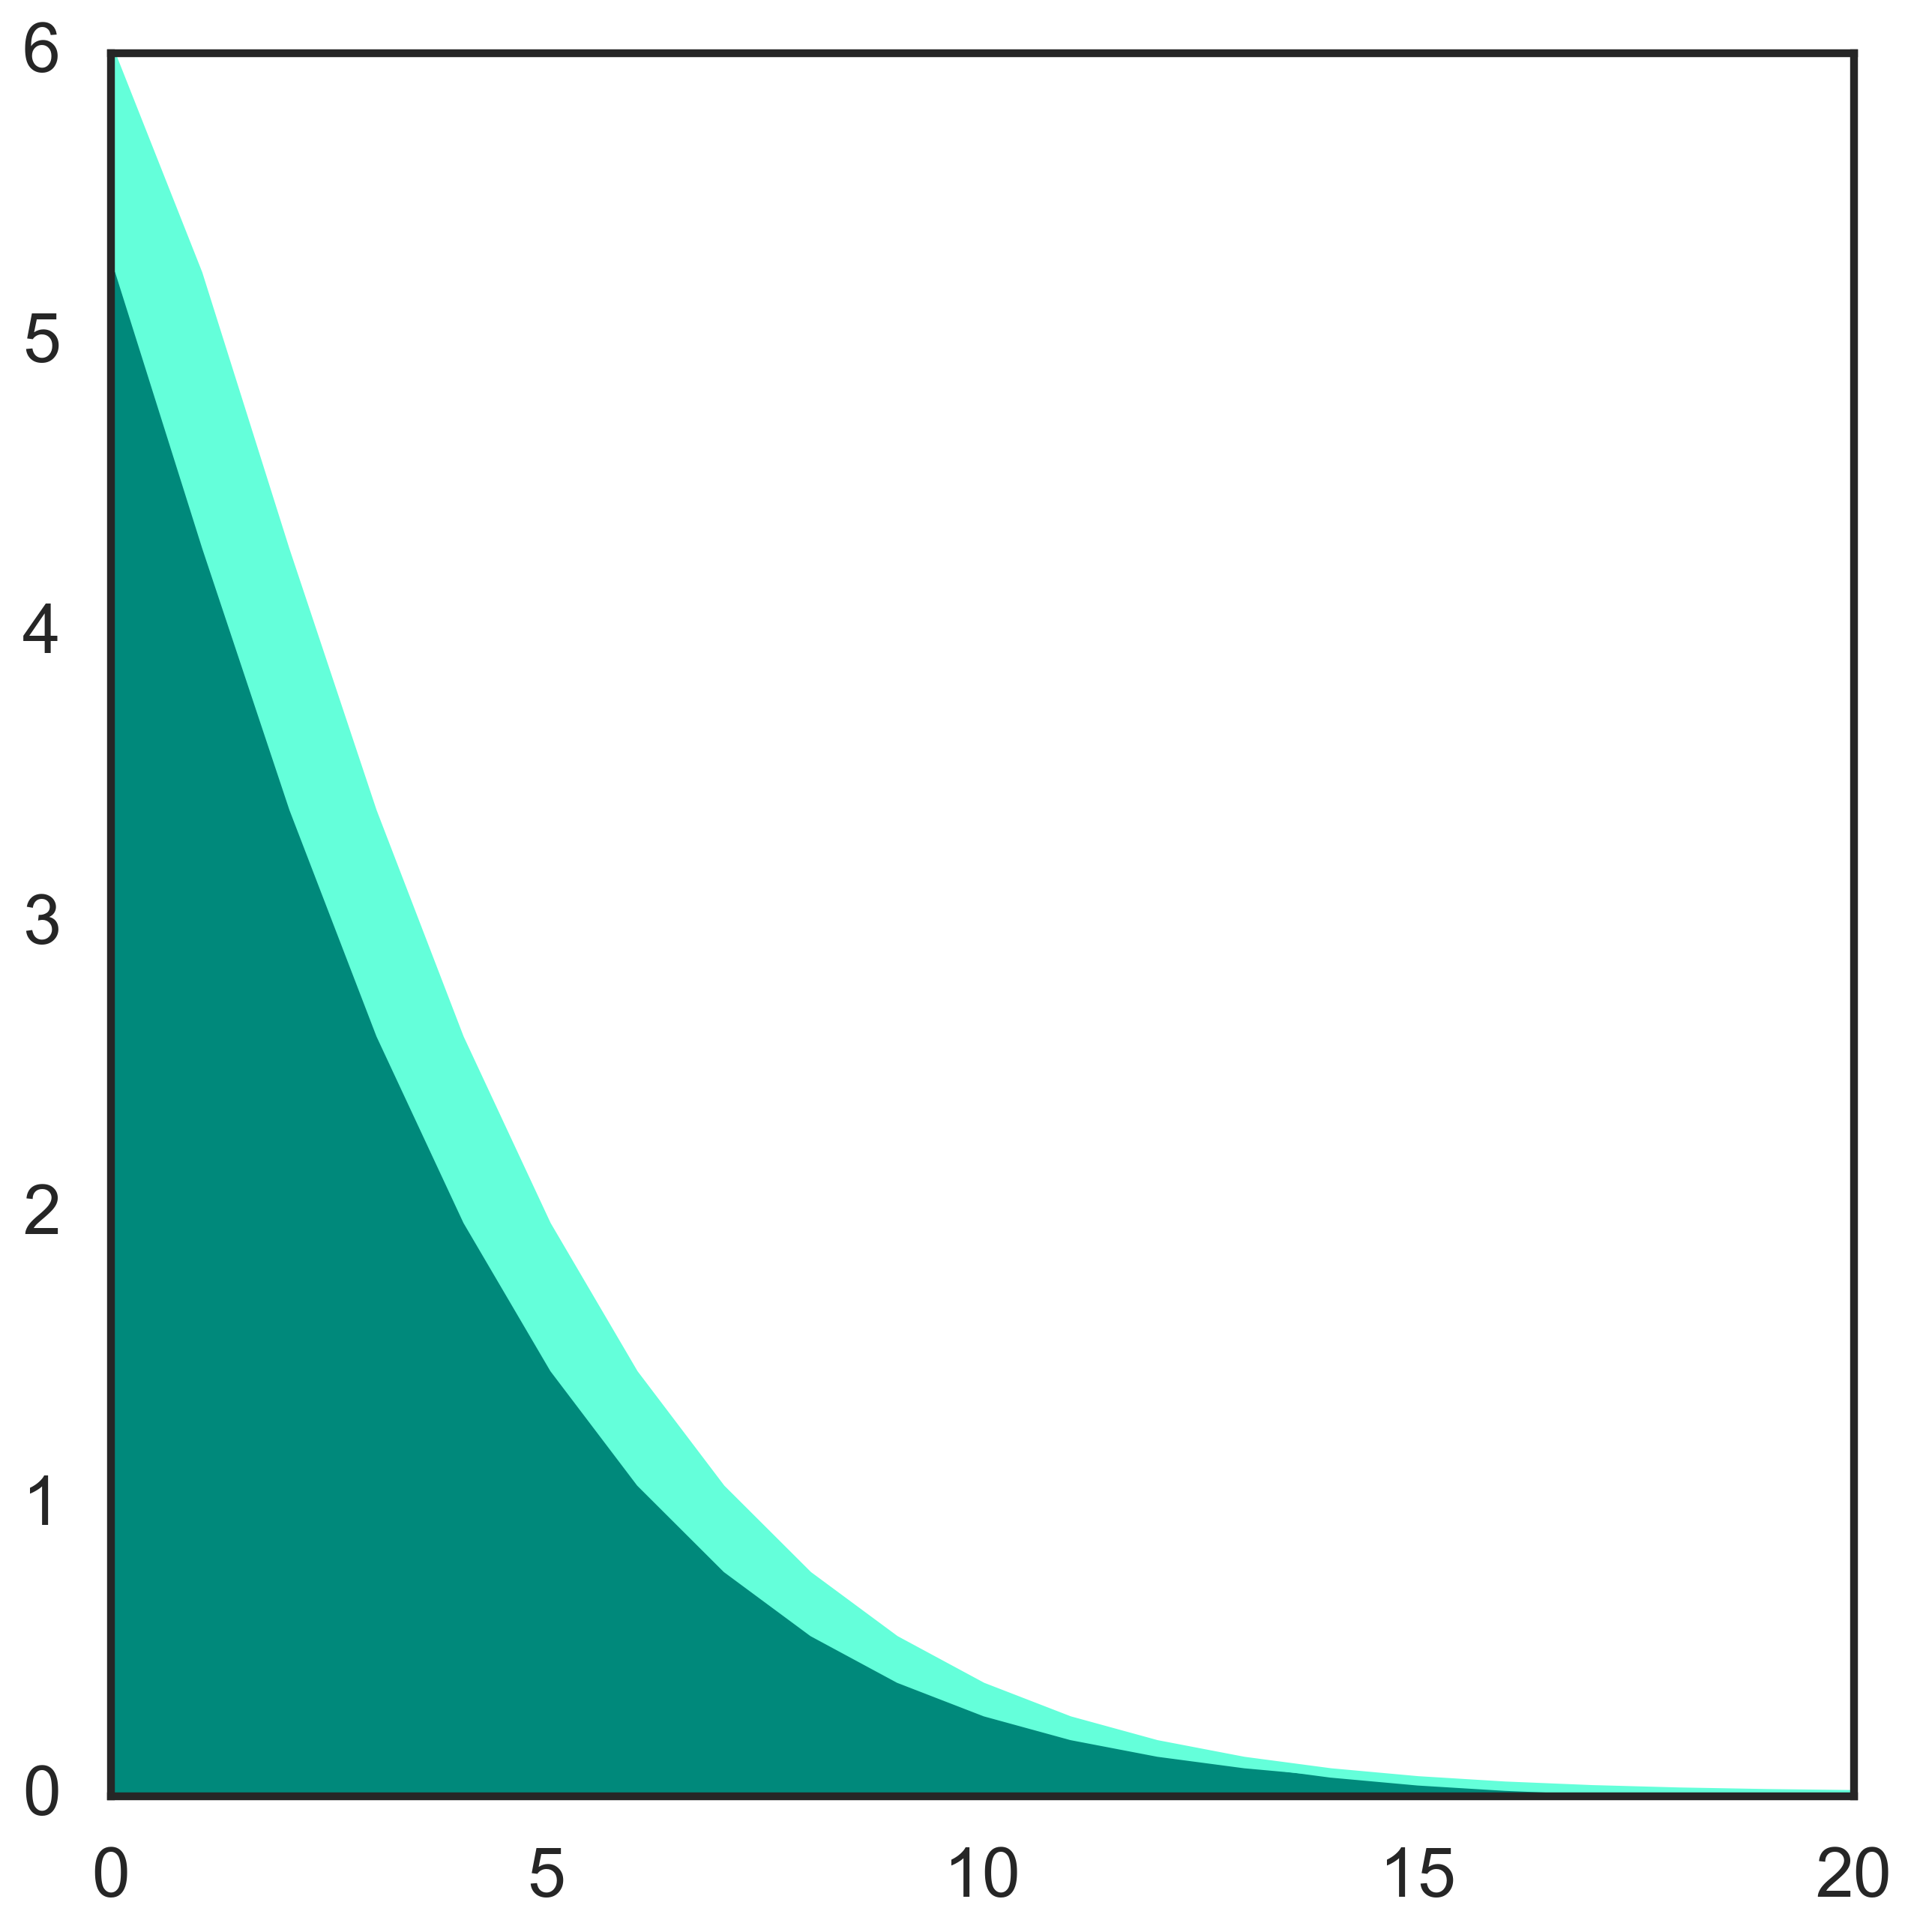

In [76]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['weibull_survival2','weibull_death2',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst, figsize=(10,10))
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
#plt.yscale('log')
#plt.ylim((1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.1, 100.0)

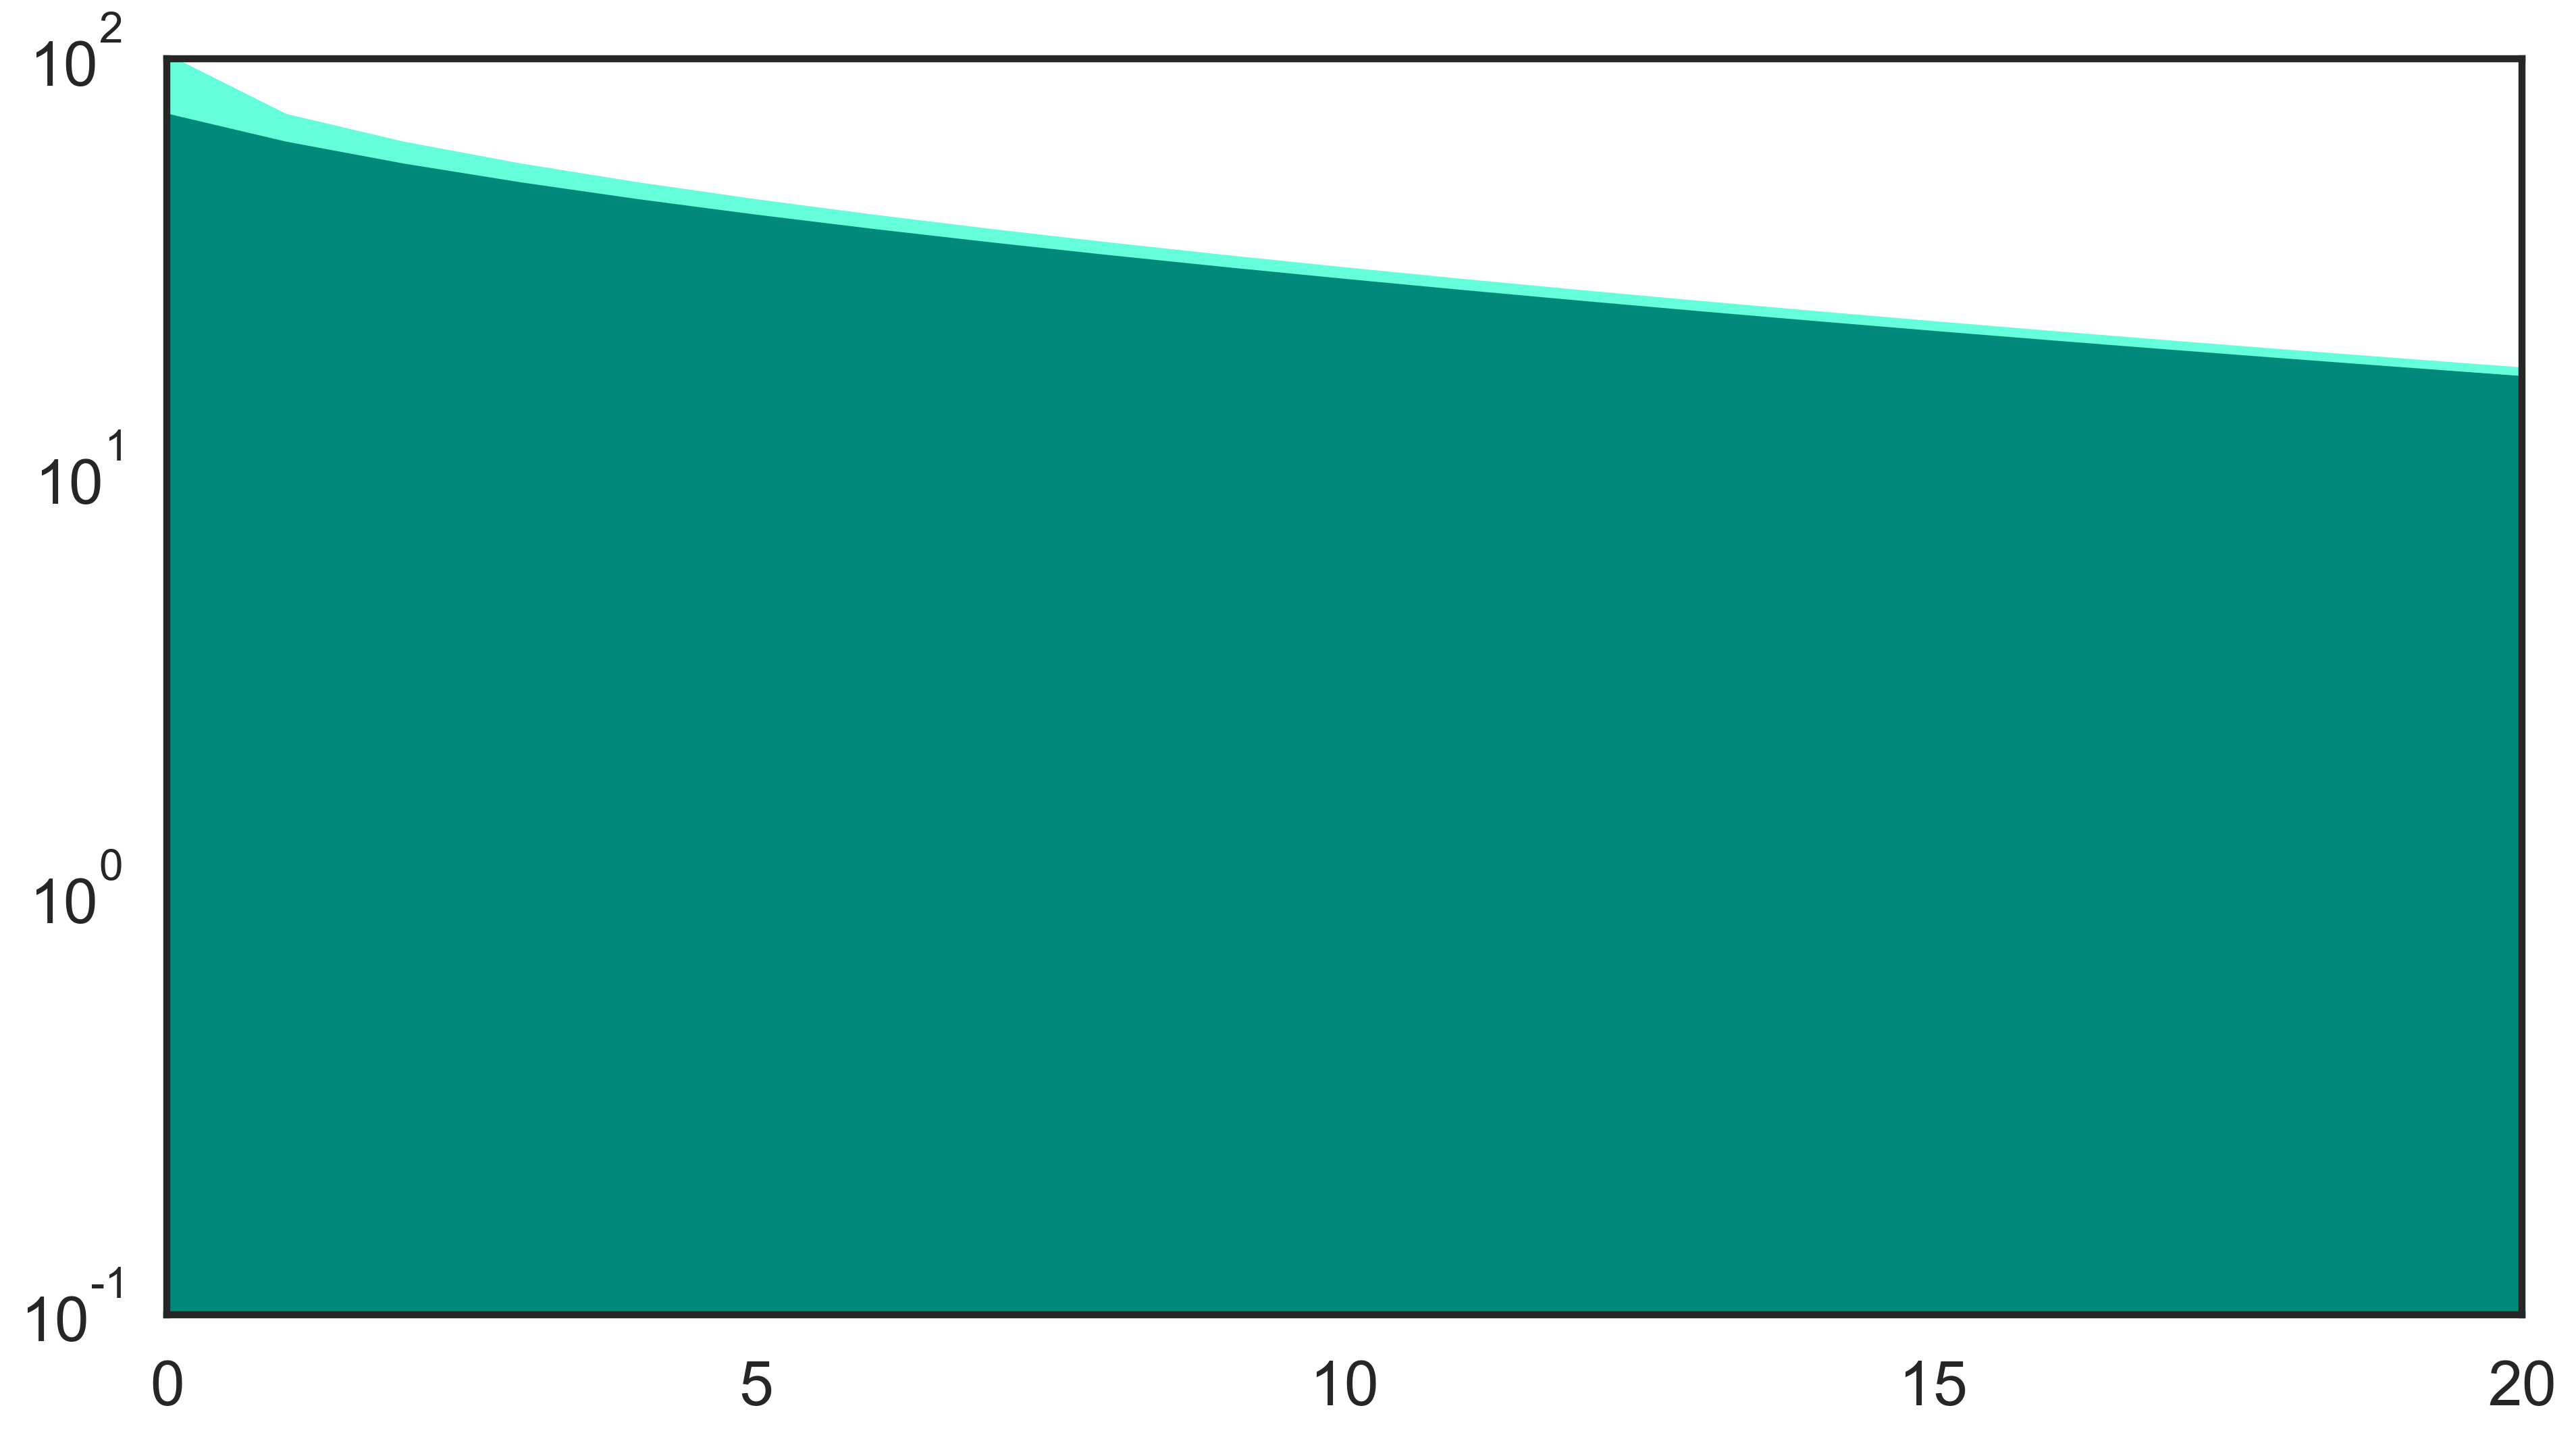

In [24]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['weibull_survival','weibull_death',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst)
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
plt.yscale('log')
plt.ylim((1e-1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(0.1, 100.0)

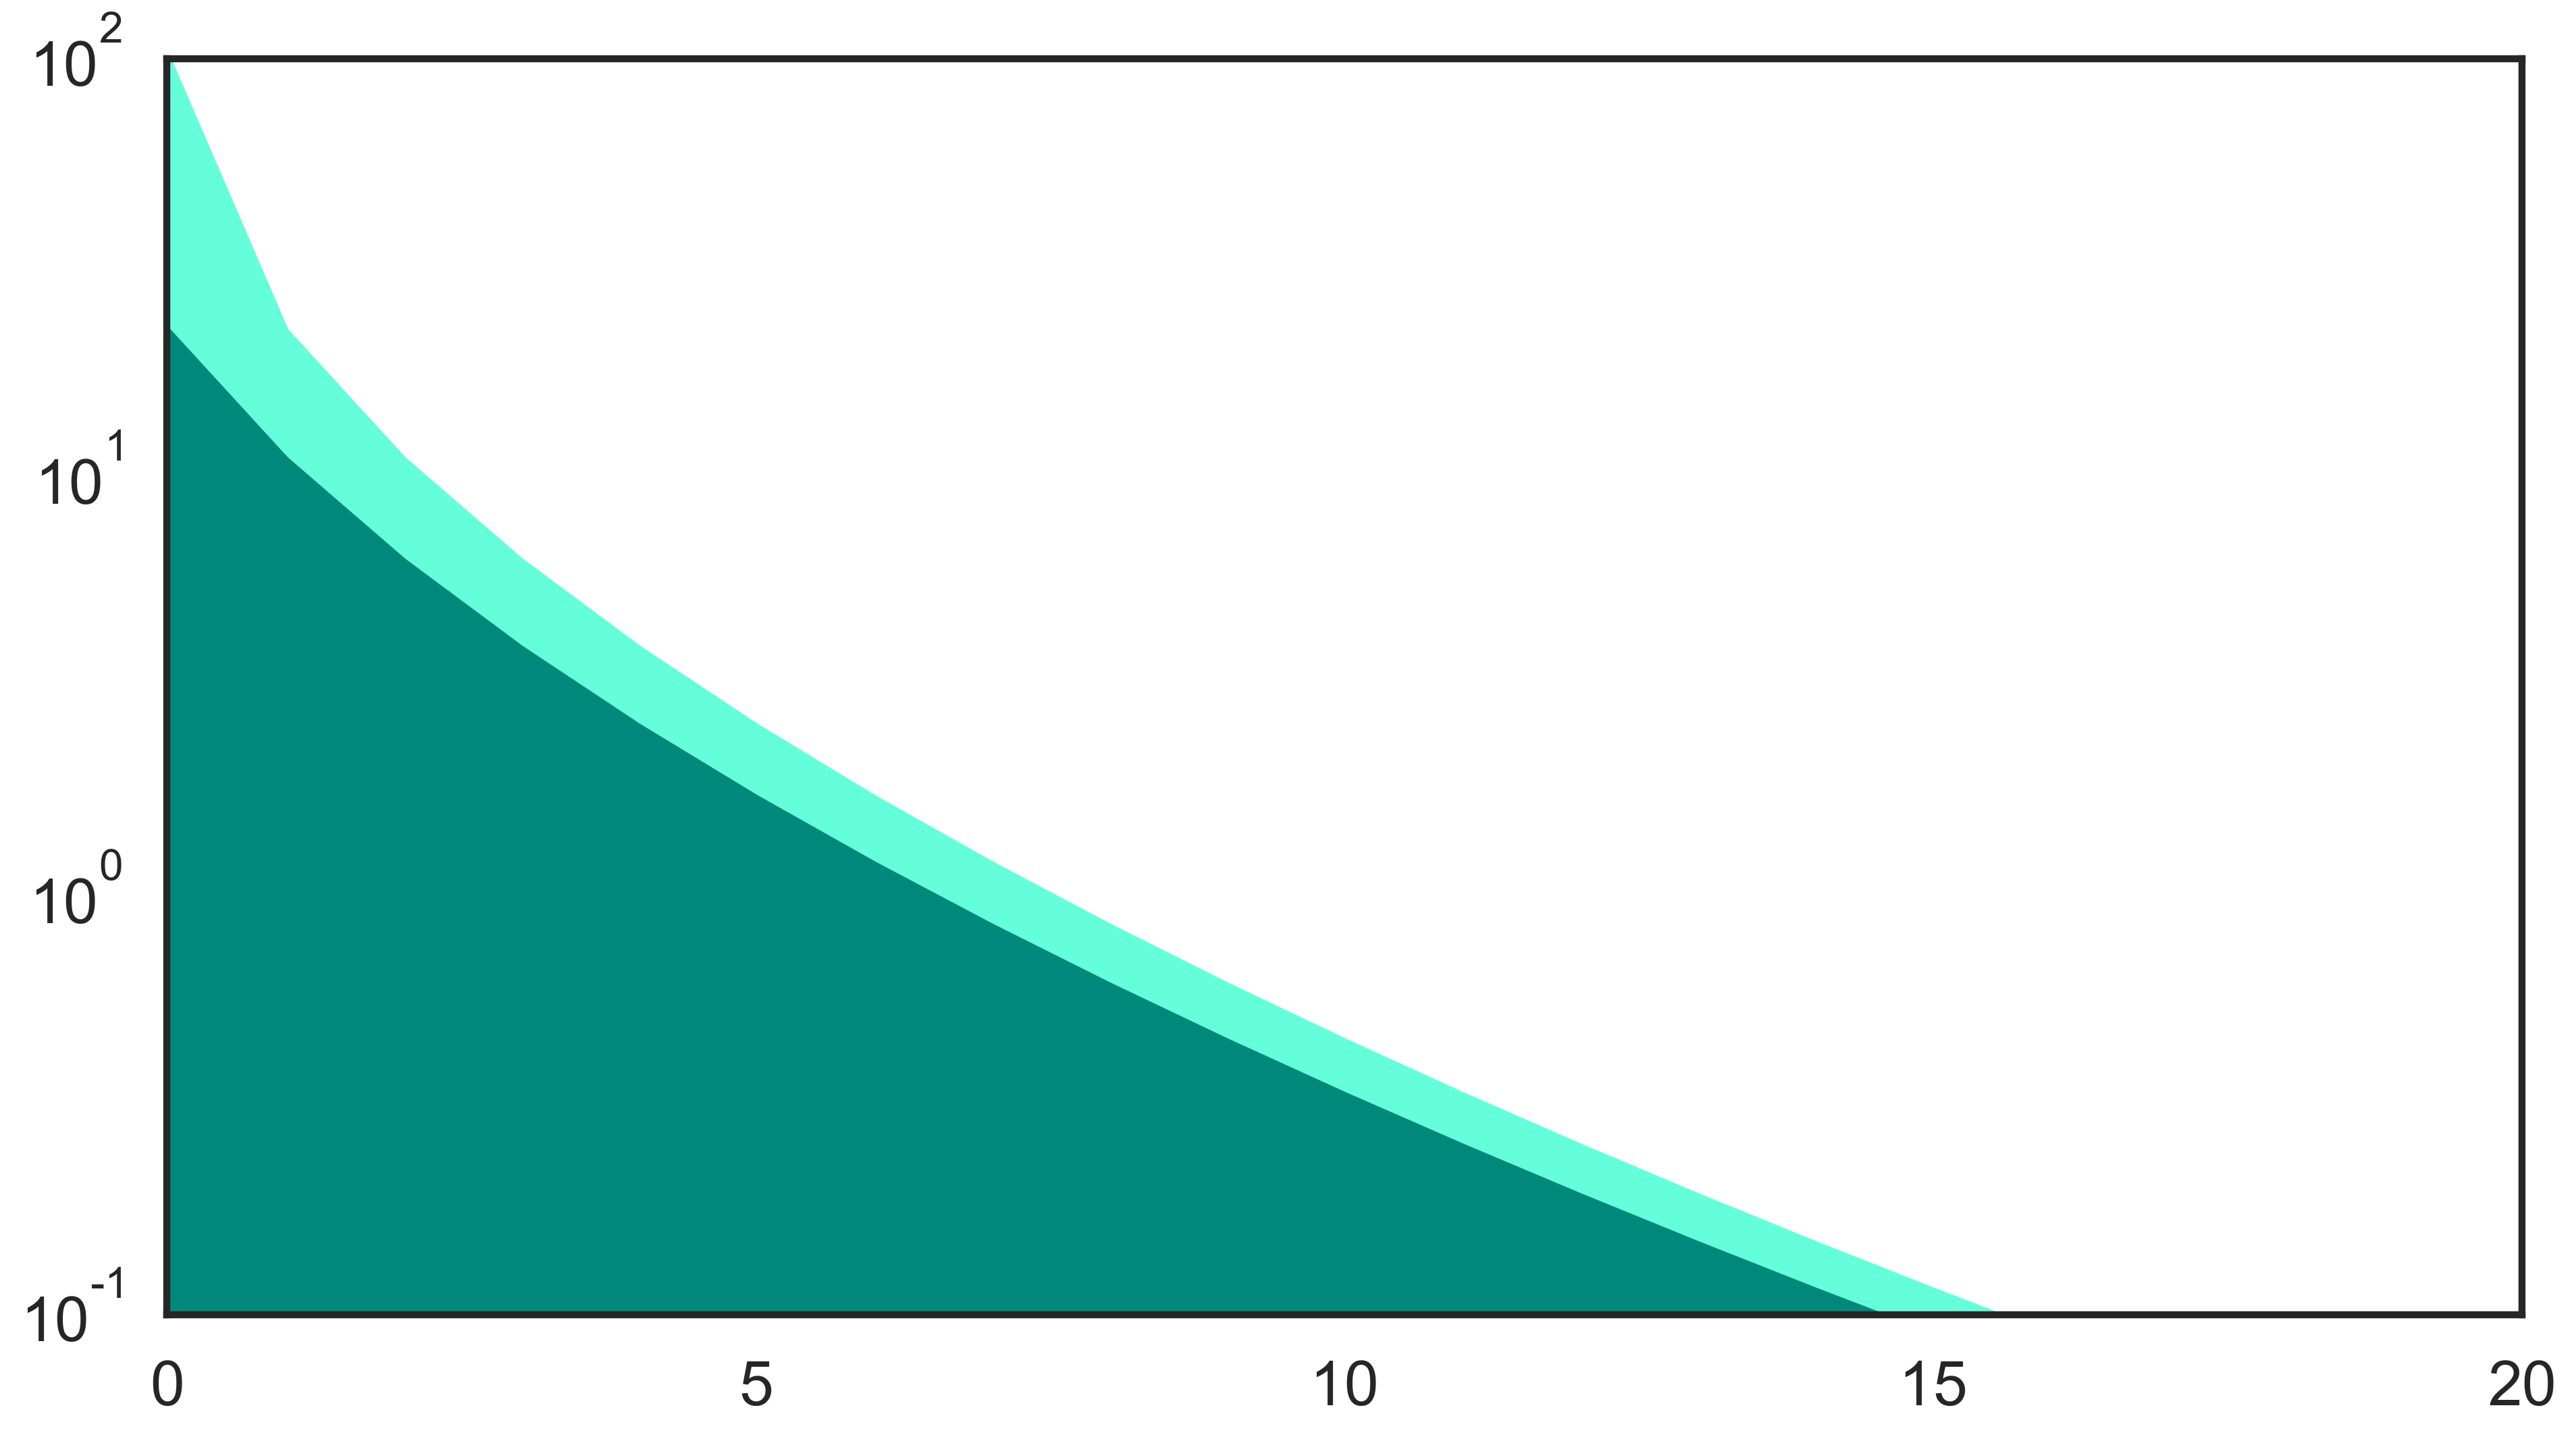

In [25]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['weibull_survival2','weibull_death2',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst)
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
plt.yscale('log')
plt.ylim((1e-1, 1e2))


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


(1e-10, 100.0)

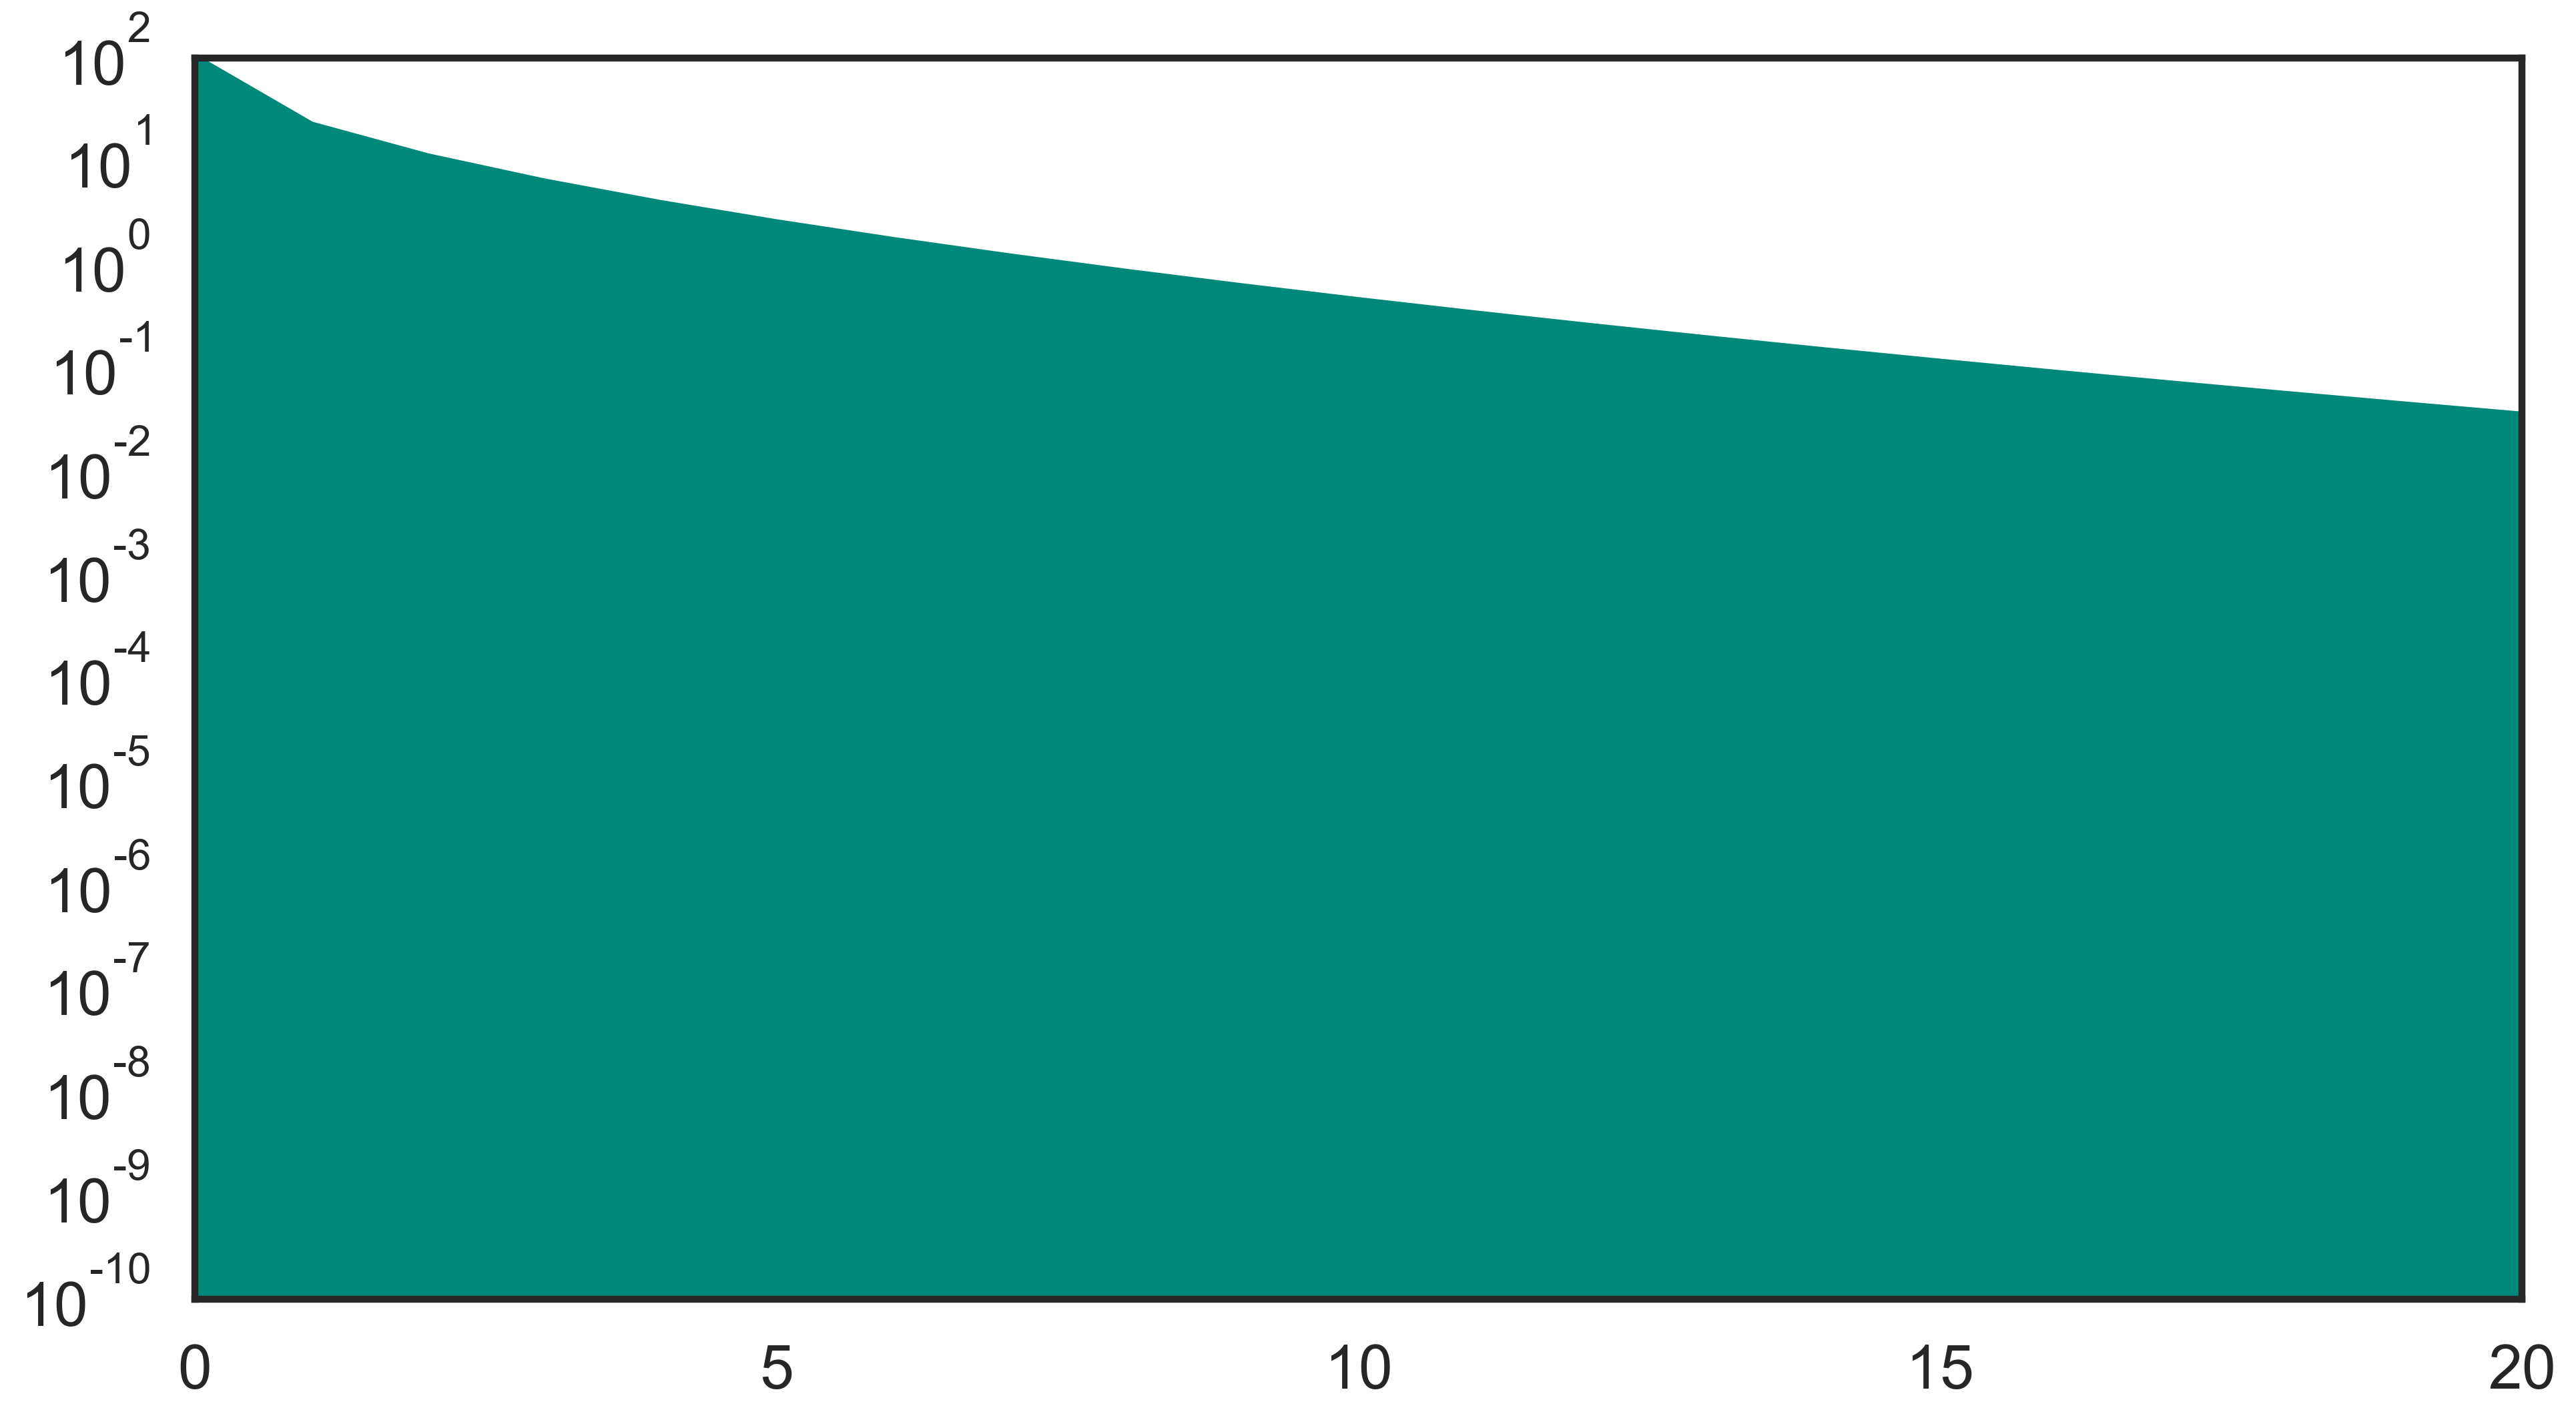

In [26]:
#sns.lineplot(data=df, x='day', y='exponential')
#sns.lineplot(data=df, x='day', y='exponential_death')
colors_lst = ['#00897b', '#64ffda', '#edbb99', '#f6ddcc']

df[['weibull2',  ]].plot.area(#stacked=False
legend=False, colors=colors_lst)
#sns.lineplot(data=df, x='day', y='biexponential sub1')
#plt.legend(False)
plt.xlim((0,20))
plt.yscale('log')
plt.ylim((1e-10, 1e2))


In [27]:
df['day']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
Name: day, dtype: int64